# Spam Project

### Problem Statement

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according being ham (legitimate) or spam.


### What is a Spam Filtering?
Spam Detector is used to detect unwanted, malicious and virus infected texts and helps to separate them from the nonspam texts. It uses a binary type of classification containing the labels such as ‘ham’ (nonspam) and spam. Application of this can be seen in Google Mail (GMAIL) where it segregates the spam emails in order to prevent them from getting into the user’s inbox.

The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.
This corpus has been collected from free or free for research sources at the Internet:

A collection of 5573 rows SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. 

A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. 


## Importing Libraries

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing, model_selection, metrics
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import plotly_express as px

In [4]:
import string
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk import pos_tag
from wordcloud import WordCloud
from collections import Counter

In [5]:
# read in the dataset and display the first few rows
df = pd.read_csv('spam.csv', encoding = 'latin-1')
df

v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  

[5572 rows x 5 columns]

# Exploratory Data Analysis

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.rename(columns= {'v1':'class_label', 'v2':'message'}, inplace=True)
df.head()

class_label                                            message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...

In [7]:
df.shape

(5572, 2)

In [8]:
df.columns

Index(['class_label', 'message'], dtype='object')

In [9]:
# check for missing values
df.isnull().sum()

class_label    0
message        0
dtype: int64

In [10]:
# calculate some basic statistics for the numerical columns
df.describe()

class_label                 message
count         5572                    5572
unique           2                    5169
top            ham  Sorry, I'll call later
freq          4825                      30

Ok But is there any difference in spam and ham messages Will do that, Once I complete label encoding of target column

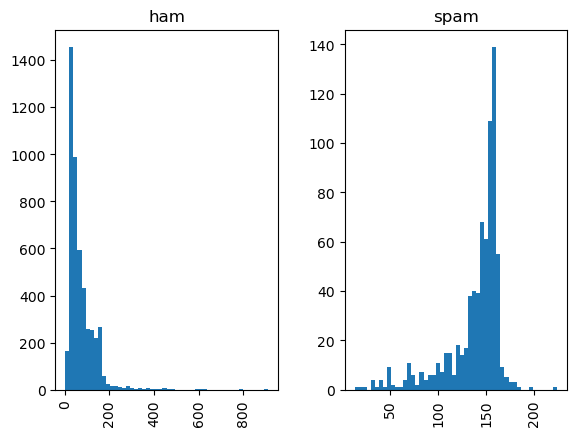

In [13]:
# visualize the distribution of email lengths for spam and non-spam emails
df.hist(column='length', by='class_label', bins=50)
plt.show()

In [14]:
df.value_counts('class_label', normalize=True)

class_label
ham     0.865937
spam    0.134063
dtype: float64

In [15]:
#distribution level
fig= px.histogram(df, x="class_label", color="class_label", color_discrete_sequence=["#871fff","#ffa78c"])
fig.show()

In [16]:
fig = px.pie(df.class_label.value_counts(),labels='index', values='class_label', color="class_label", color_discrete_sequence=["#871fff","#ffa78c"] )
fig.show()

87%ham and 13%spam messages present in the dataset

Before building model I want to check the number of words,character and sentences present in the spam & ham messages Is there any difference? Let's check by using nltk library

p.s: The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP). It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning

In [12]:
df['length'] = df['message'].apply(len)
df.head()

class_label                                            message  length
0         ham  Go until jurong point, crazy.. Available only ...     111
1         ham                      Ok lar... Joking wif u oni...      29
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3         ham  U dun say so early hor... U c already then say...      49
4         ham  Nah I don't think he goes to usf, he lives aro...      61

In [17]:
fig = px.histogram(df, x="length", color="class_label", color_discrete_sequence=["#871fff","#ffa78c"] )
fig.show()

Spam messages found to lengthier than ham messages

In [18]:
# create a new column that indicates whether the email subject is all uppercase
df['all_upper'] = df['message'].str.isupper()

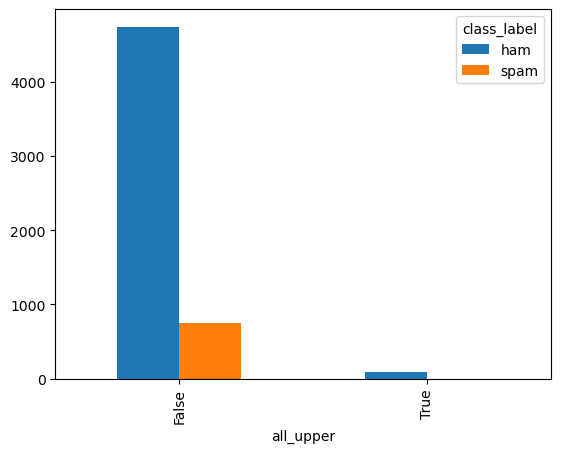

In [19]:
# visualize the distribution of all_upper for spam and non-spam emails
pd.crosstab(df['all_upper'], df['class_label']).plot(kind='bar')
plt.show()

In [20]:
df_orig=df

In [21]:
df_orig['word_count'] = df_orig.message.apply(lambda x: len(x.split(' ')))

In [22]:
df_orig.groupby('class_label')['word_count'].agg(['count','mean','median'])

count       mean  median
class_label                          
ham           4825  14.323938    11.0
spam           747  23.892905    25.0

In [23]:
df_orig

class_label                                            message  length  \
0            ham  Go until jurong point, crazy.. Available only ...     111   
1            ham                      Ok lar... Joking wif u oni...      29   
2           spam  Free entry in 2 a wkly comp to win FA Cup fina...     155   
3            ham  U dun say so early hor... U c already then say...      49   
4            ham  Nah I don't think he goes to usf, he lives aro...      61   
...          ...                                                ...     ...   
5567        spam  This is the 2nd time we have tried 2 contact u...     161   
5568         ham              Will Ì_ b going to esplanade fr home?      37   
5569         ham  Pity, * was in mood for that. So...any other s...      57   
5570         ham  The guy did some bitching but I acted like i'd...     125   
5571         ham                         Rofl. Its true to its name      26   

      all_upper  word_count  
0         False          20  
1         False           6  
2         False          28  
3         False          11  
4         False          13  
...         ...         ...  
5567      False          30  
5568      False           8  
5569      False          10  
5570      False          26  
5571      False           6  

[5572 rows x 5 columns]

In [24]:
df.drop(columns=['all_upper'], inplace=True)

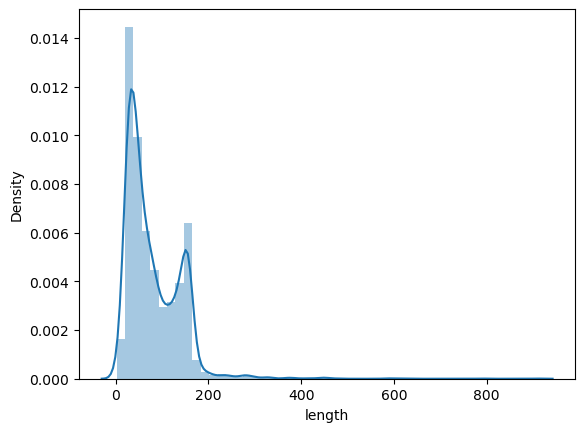

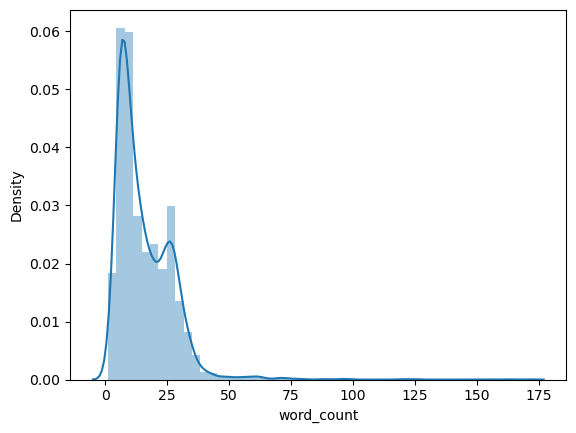

In [25]:
#Plotting distplot for checking the distribution of data
for col in df.describe().columns:
    sns.distplot(df[col])
    plt.show()

In [26]:
#Checking correlation of the dataset
corr=df.corr()  #corr() function provides the correlation value of each column
corr

length  word_count
length      1.000000    0.974318
word_count  0.974318    1.000000

all are having some correlation but let's check the same in value mode through heatmap

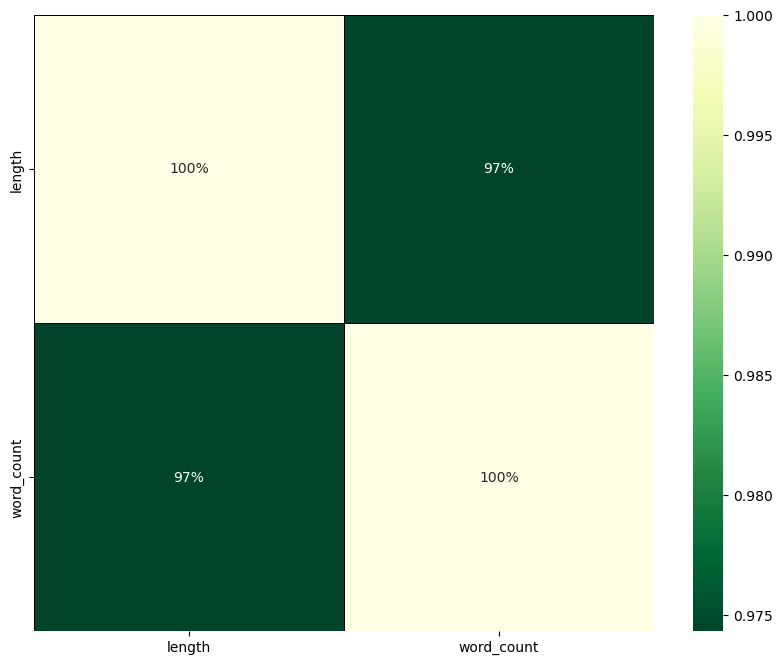

In [27]:
#Plotting heatmap for visualizing the correlation
plt.figure(figsize=(10,8))
sns.heatmap(corr,linewidth=0.5,linecolor='black',fmt='.0%',cmap='YlGn_r',annot=True)
plt.show()

There is multi collinearity between Number of sentences,words,characters

Steps to be followed
1)Lower case

2)Tokenization

3)Removing special characters

4)Removing stopwords and punctuations

5)Stemming

In [28]:
import wordcloud
data_ham  = df[df['class_label'] == "ham"].copy()
data_spam = df[df['class_label'] == "spam"].copy()

def show_wordcloud(df, title):
    text = ' '.join(df['message'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords, background_color="#ffa78c",
                                        width = 3000, height = 2000).generate(text)
    plt.figure(figsize=(15,15), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

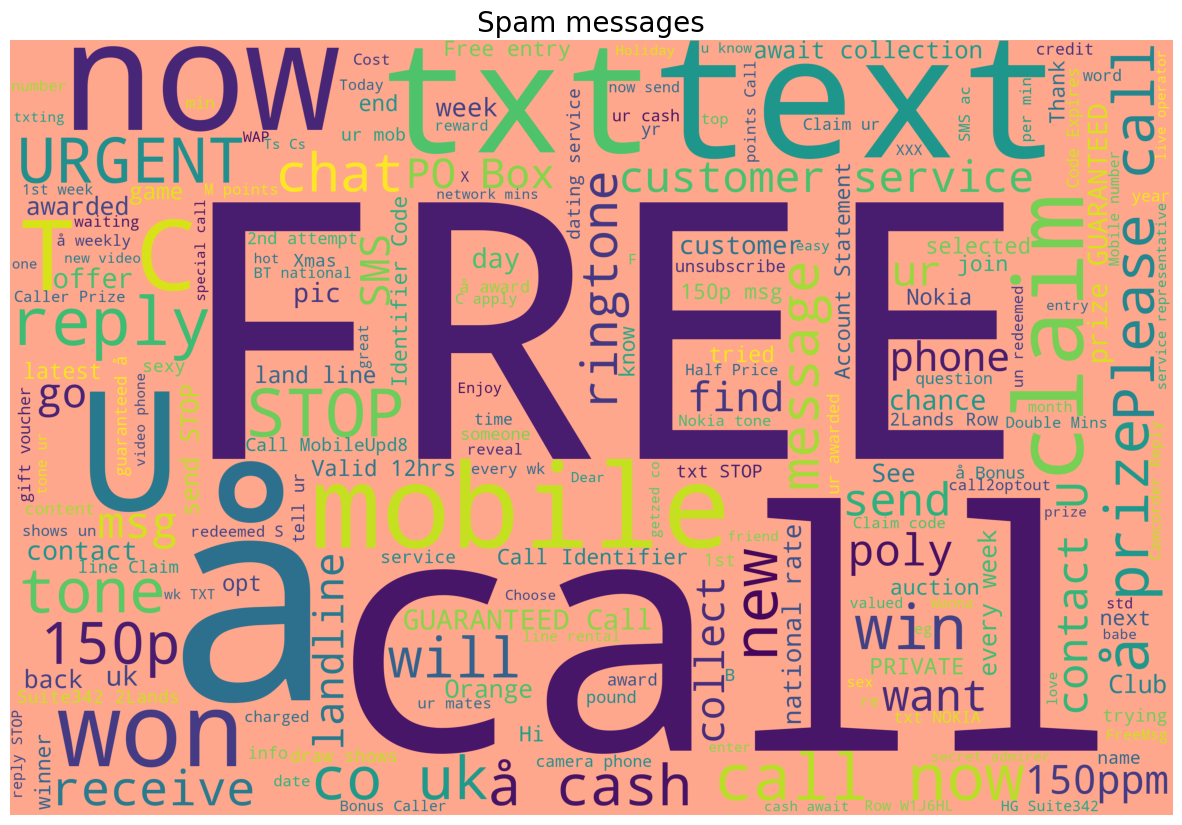

In [29]:
show_wordcloud(data_spam, "Spam messages")

From the above wordclouds, we can see that the large texts have more weightage in their respective type of comments whereas small texts have the lesser weightages

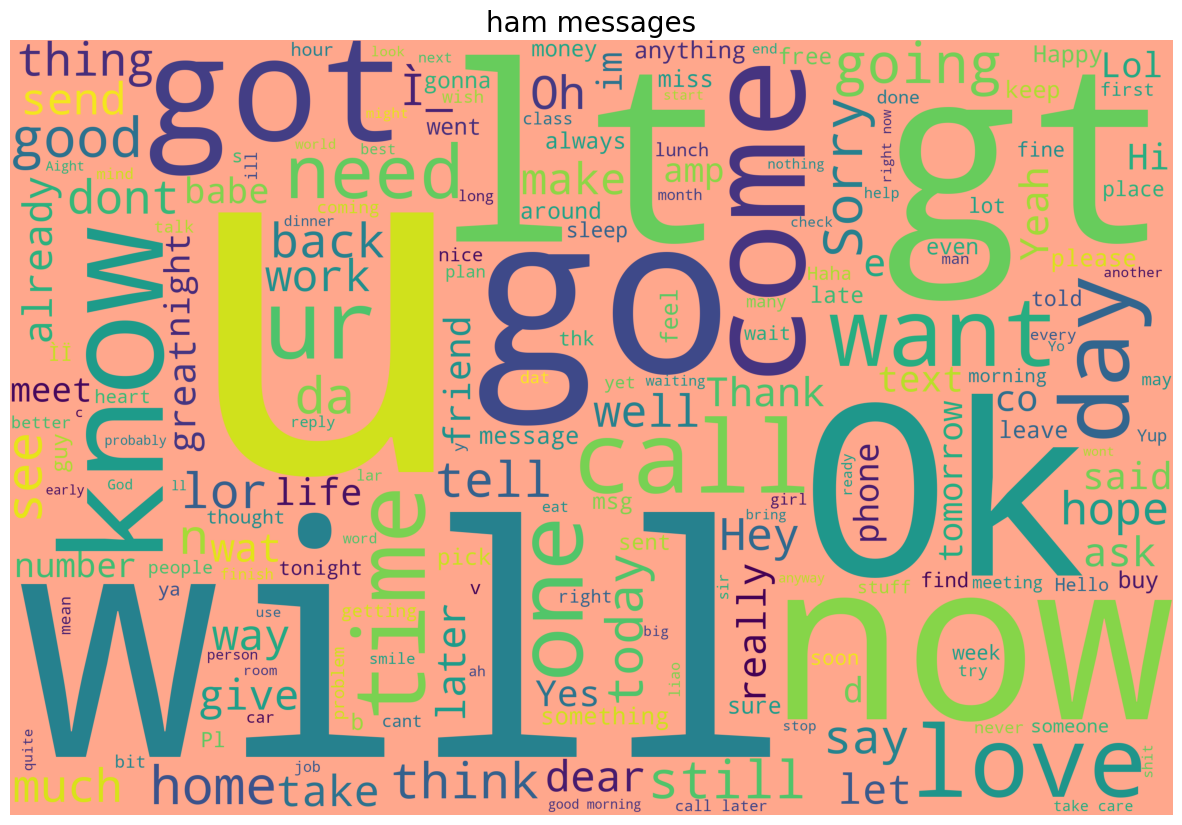

In [30]:
show_wordcloud(data_ham, "ham messages")

From the above wordclouds, we can see that the large texts have more weightage in their respective type of comments whereas small texts have the lesser weightages

# Data pre-processing

In [31]:
df['class_label'] = df['class_label'].map( {'spam': 1, 'ham': 0})

In [32]:
# Replace email address with 'emailaddress'
df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

# Replace urls with 'webaddress'
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

# Replace money symbol with 'money-symbol'
df['message'] = df['message'].str.replace(r'£|\$', 'money-symbol')

# Replace 10 digit phone number with 'phone-number'
df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phone-number')

# Replace normal number with 'number'
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', 'number')

# remove punctuation
df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')

# remove whitespace between terms with single space
df['message'] = df['message'].str.replace(r'\s+', ' ')

# remove leading and trailing whitespace
df['message'] = df['message'].str.replace(r'^\s+|\s*?$', ' ')

# change words to lower case
df['message'] = df['message'].str.lower()


# Preprocessing using NLP

As machines cannot understand text words, we have to convert them into machine readable form. To do that, here we are going to use vectorization techinque

In [33]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['message'] = df['message'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [34]:
ss = nltk.SnowballStemmer("english")
df['message'] = df['message'].apply(lambda x: ' '.join(ss.stem(term) for term in x.split()))

In [35]:
sms_df = df['message']
from nltk.tokenize import word_tokenize

# creating a bag-of-words model
all_words = []
for sms in sms_df:
    words = word_tokenize(sms)
    for w in words:
        all_words.append(w)
     
all_words = nltk.FreqDist(all_words) 

In [36]:
print('Number of words: {}'.format(len(all_words)))

Number of words: 6526


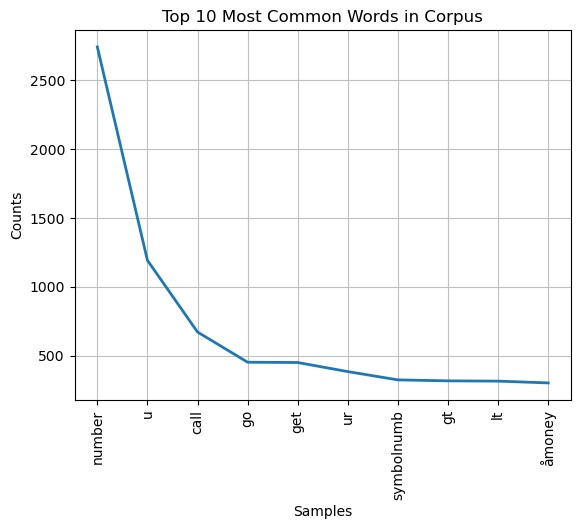

In [37]:
all_words.plot(10, title='Top 10 Most Common Words in Corpus');

What we have here in our data set is a large collection of text data (5,572 rows of data). Most ML algorithms rely on numerical data to be fed into them as input, and email/sms messages are usually text heavy. We need a way to represent text data for machine learning algorithm and the bag-of-words model helps us to achieve that task. It is a way of extracting features from the text for use in machine learning algorithms. In this approach, we use the tokenized words for each observation and find out the frequency of each token. Using a process which we will go through now, we can convert a collection of documents to a matrix, with each document being a row and each word(token) being the column, and the corresponding (row,column) values being the frequency of occurrence of each word or token in that document.

For example:

Lets say we have 4 documents as follows:

['Hello, how are you!', 'Win money, win from home.', 'Call me now', 'Hello, Call you tomorrow?']

Our objective here is to convert this set of text to a frequency distribution matrix

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer()
tfidf_vec=tfidf_model.fit_transform(sms_df)
import pickle
#serializing our model to a file called model.pkl
pickle.dump(tfidf_model, open("tfidf_model.pkl","wb"))
tfidf_data=pd.DataFrame(tfidf_vec.toarray())
tfidf_data.head()

0     1     2     3     4     5     6     7     8     9     ...  6496  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   6497  6498  6499  6500  6501  6502  6503  6504  6505  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 6506 columns]

In [39]:
df

class_label                                            message  length  \
0               0  go jurong point crazi avail bugi n great world...     111   
1               0                              ok lar joke wif u oni      29   
2               1  free entri number wkli comp win fa cup final t...     155   
3               0                u dun say earli hor u c alreadi say      49   
4               0               nah think goe usf live around though      61   
...           ...                                                ...     ...   
5567            1  numbernd time tri number contact u u åmoney sy...     161   
5568            0                           ì_ b go esplanad fr home      37   
5569            0                                  piti mood suggest      57   
5570            0  guy bitch act like interest buy someth els nex...     125   
5571            0                                     rofl true name      26   

      word_count  
0             20  
1              6  
2             28  
3             11  
4             13  
...          ...  
5567          30  
5568           8  
5569          10  
5570          26  
5571           6  

[5572 rows x 4 columns]

Here as we can see, the documents are numbered in the rows, and each word is a column name, with the corresponding value being the frequency of that word in the document.

Lets break this down and see how we can do this conversion using a small set of documents.

To handle this, we will be using sklearns count vectorizer method which does the following:

It tokenizes the string(separates the string into individual words) and gives an integer ID to each token. It counts the occurrence of each of those tokens.

# Separating independent and dependent variables

In [40]:
### Separating Columns
df_train = tfidf_data.iloc[:4457]
df_test = tfidf_data.iloc[4457:]

target = df['class_label']
df_train['class_label'] = target

y = df_train['class_label']
X = df_train.drop('class_label',axis=1)

# splitting training data into train and validation using sklearn
from sklearn import model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=.2, random_state=42)

# Building the model

In [41]:
#Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import hamming_loss, log_loss

In [42]:
#Initializing the instance of the model
LR=LogisticRegression()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()

In [43]:
models= []
models.append(('Logistic Regression',LR))
models.append(('MultinomialNB',mnb))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knc))
models.append(('RandomForestClassifier',rfc))
models.append(('AdaBoostClassifier',abc))
models.append(('GradientBoostingClassifier',gbc))
models.append(('XGBoostClassifier',xgb))

## Handling the imbalanced data using oversampling technique

In [44]:
#Importing the Oversampling library and Counter
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [45]:
#Splitting the training and testing data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [46]:
#We are trying to increase the points of minimum label data
os = RandomOverSampler(0.75)
x_train_os,y_train_os = os.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({0: 2698, 1: 421})
The number of classes after fit Counter({0: 2698, 1: 2023})


****************************** Logistic Regression ***************************


LogisticRegression()


accuracy_score:  0.9820627802690582


cross_val_score:  0.9667939987820408


roc_auc_score:  0.9546741668536939


Hamming_loss: 0.017937219730941704


Log_loss : 0.6195349998914271


Classification report:
 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1157
           1       0.95      0.92      0.93       181

    accuracy                           0.98      1338
   macro avg       0.97      0.95      0.96      1338
weighted avg       0.98      0.98      0.98      1338



Confusion matrix: 

[[1148    9]
 [  15  166]]


AUC_ROC curve:



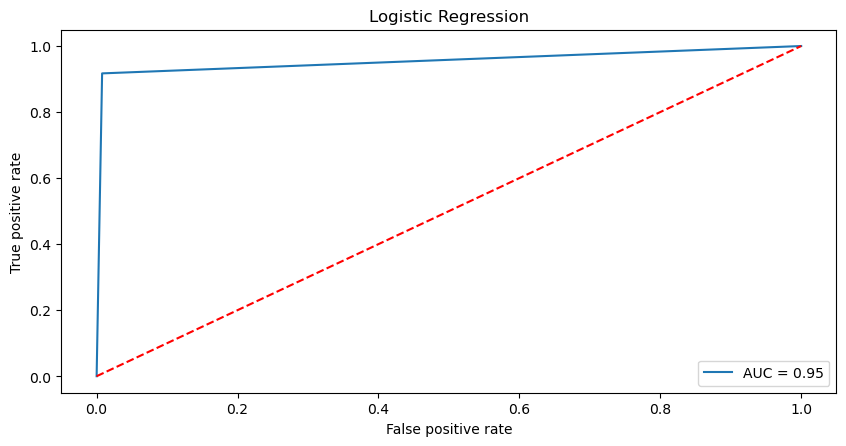





****************************** MultinomialNB ***************************


MultinomialNB()


accuracy_score:  0.9775784753363229


cross_val_score:  0.9688131942242556


roc_auc_score:  0.9730537635435517


Hamming_loss: 0.02242152466367713


Log_loss : 0.7744263693465219


Classification report:
 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1157
           1       0.88      0.97      0.92       181

    accuracy                           0.98      1338
   macro avg       0.94      0.97      0.95      1338
weighted avg       0.98      0.98      0.98      1338



Confusion matrix: 

[[1133   24]
 [   6  175]]


AUC_ROC curve:



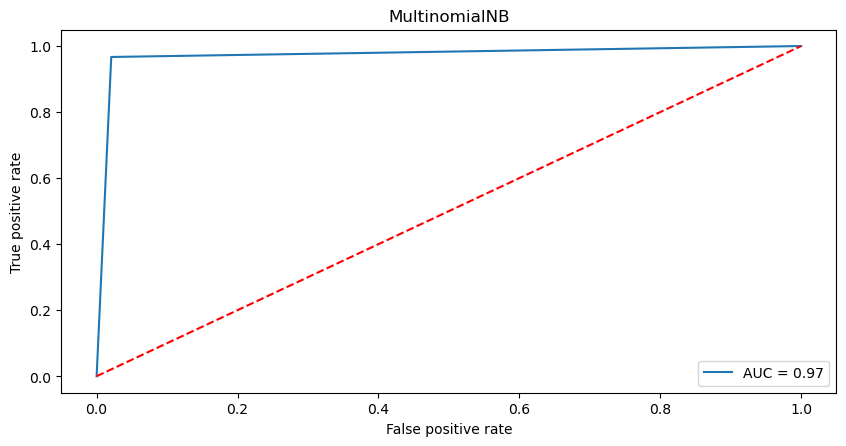





****************************** DecisionTreeClassifier ***************************


DecisionTreeClassifier()


accuracy_score:  0.968609865470852


cross_val_score:  0.9748700256174097


roc_auc_score:  0.9329137558077902


Hamming_loss: 0.03139013452914798


Log_loss : 1.0841893872438595


Classification report:
 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1157
           1       0.88      0.88      0.88       181

    accuracy                           0.97      1338
   macro avg       0.93      0.93      0.93      1338
weighted avg       0.97      0.97      0.97      1338



Confusion matrix: 

[[1136   21]
 [  21  160]]


AUC_ROC curve:



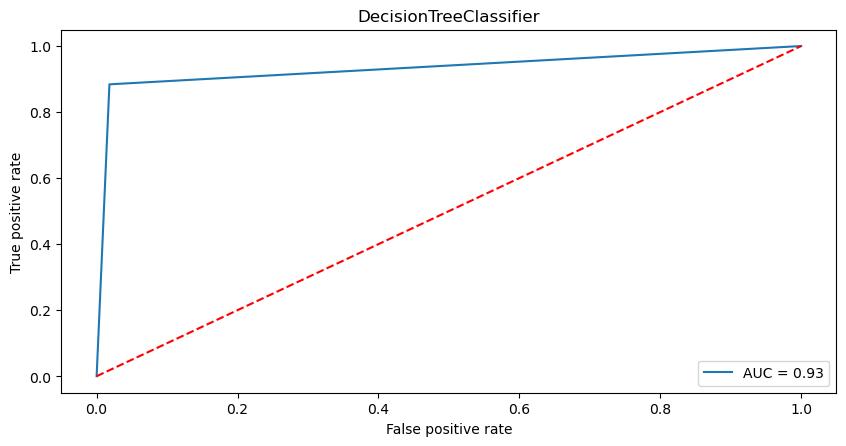





****************************** KNeighborsClassifier ***************************


KNeighborsClassifier()


accuracy_score:  0.9461883408071748


cross_val_score:  0.9062131026256587


roc_auc_score:  0.8057655300190528


Hamming_loss: 0.053811659192825115


Log_loss : 1.8585900595130271


Classification report:
 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1157
           1       0.98      0.61      0.76       181

    accuracy                           0.95      1338
   macro avg       0.96      0.81      0.86      1338
weighted avg       0.95      0.95      0.94      1338



Confusion matrix: 

[[1155    2]
 [  70  111]]


AUC_ROC curve:



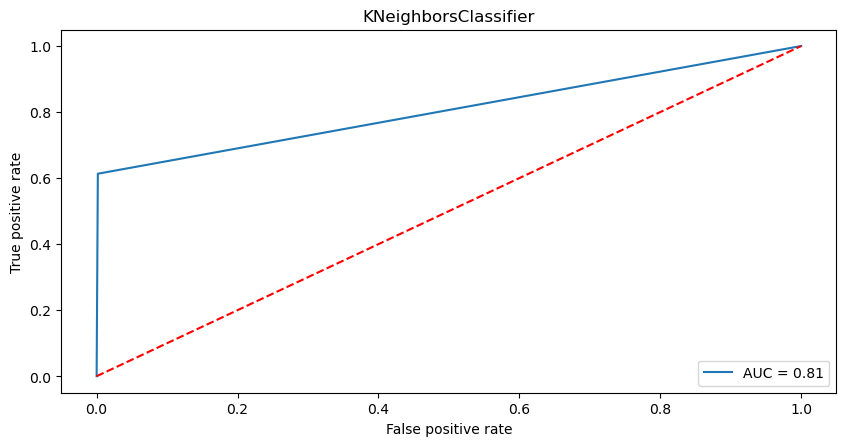





****************************** RandomForestClassifier ***************************


RandomForestClassifier()


accuracy_score:  0.9805680119581465


cross_val_score:  0.9820504496887157


roc_auc_score:  0.9305070744017916


Hamming_loss: 0.01943198804185351


Log_loss : 0.6711576874926078


Classification report:
 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1157
           1       0.99      0.86      0.92       181

    accuracy                           0.98      1338
   macro avg       0.99      0.93      0.96      1338
weighted avg       0.98      0.98      0.98      1338



Confusion matrix: 

[[1156    1]
 [  25  156]]


AUC_ROC curve:



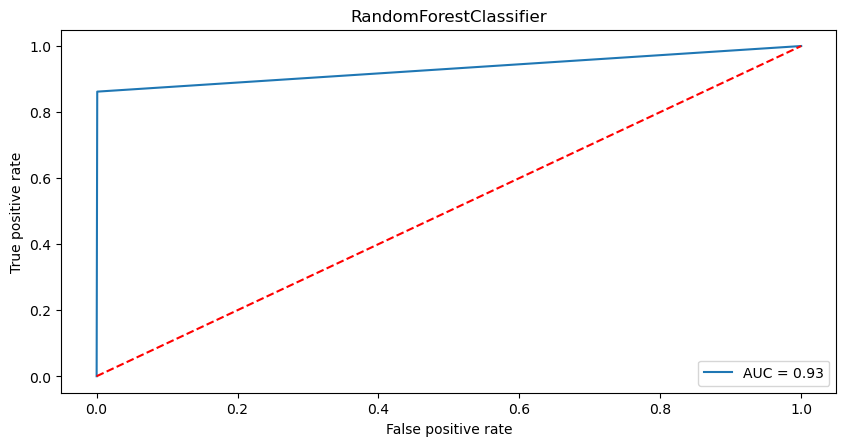





****************************** AdaBoostClassifier ***************************


AdaBoostClassifier()


accuracy_score:  0.9715994020926756


cross_val_score:  0.9755441812243009


roc_auc_score:  0.9439634795646962


Hamming_loss: 0.028400597907324365


Log_loss : 0.9809344503382968


Classification report:
 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1157
           1       0.89      0.91      0.90       181

    accuracy                           0.97      1338
   macro avg       0.94      0.94      0.94      1338
weighted avg       0.97      0.97      0.97      1338



Confusion matrix: 

[[1136   21]
 [  17  164]]


AUC_ROC curve:



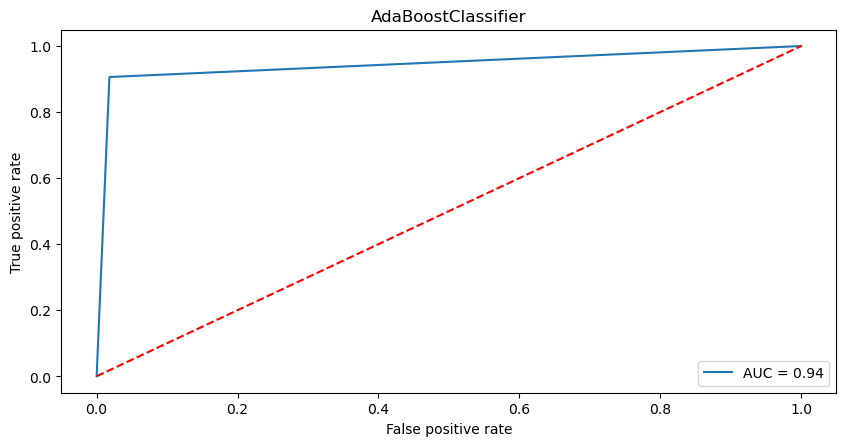





****************************** GradientBoostingClassifier ***************************


GradientBoostingClassifier()


accuracy_score:  0.9708520179372198


cross_val_score:  0.9750942408640466


roc_auc_score:  0.9528524427338754


Hamming_loss: 0.02914798206278027


Log_loss : 1.0067511725969378


Classification report:
 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1157
           1       0.87      0.93      0.90       181

    accuracy                           0.97      1338
   macro avg       0.93      0.95      0.94      1338
weighted avg       0.97      0.97      0.97      1338



Confusion matrix: 

[[1131   26]
 [  13  168]]


AUC_ROC curve:



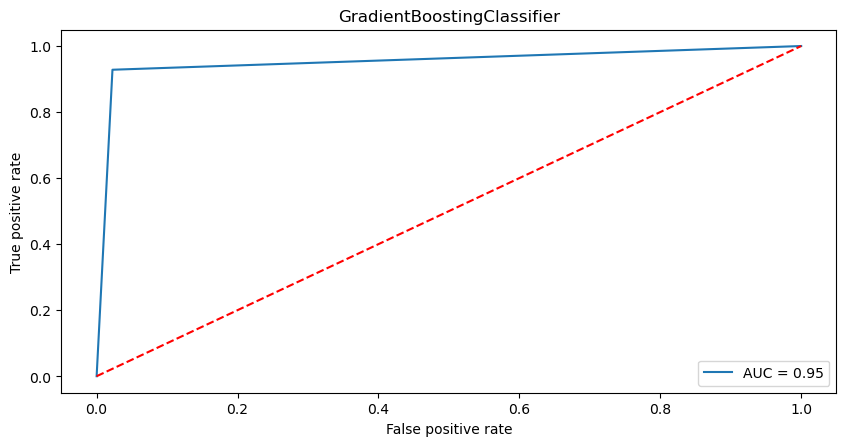





****************************** XGBoostClassifier ***************************


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


accuracy_score:  0.984304932735426


cross_val_score:  0.9793565953506164


roc_auc_score:  0.9606311808496921


Hamming_loss: 0.01569506726457399


Log_loss : 0.542093199605805


Classification report:
 
           

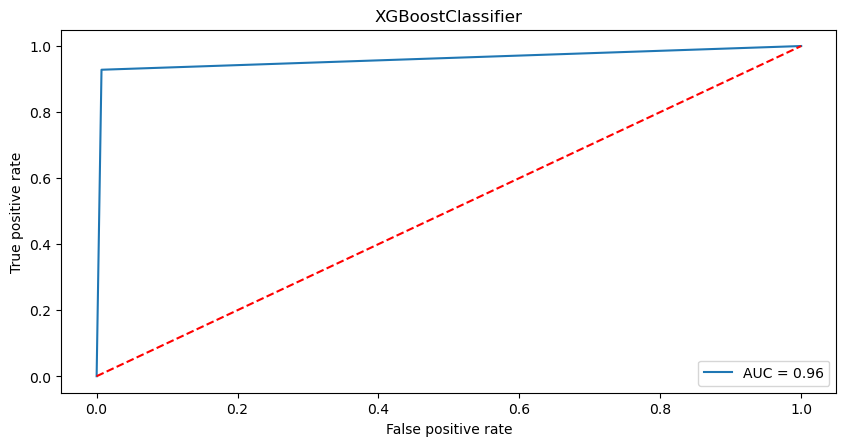

In [47]:
#Making a for loop and calling the algorithm one by one and save data to respective model using append function
Model=[]
score=[]
cvs=[]
rocscore=[]
h_loss=[]
l_loss=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train_os,y_train_os)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,X,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score: ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    hloss = hamming_loss(y_test, pre)
    print("Hamming_loss:", hloss)
    h_loss.append(hloss)
    print('\n')
    try : 
        loss = log_loss(y_test, pre)
    except :
            loss = log_loss(y_test, pre.toarray())   
    print("Log_loss :", loss)
    l_loss.append(loss)
    print('\n')
    print('Classification report:\n ')
    print(classification_report(y_test,pre))
    print('\n')
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,50))
    plt.subplot(912)
    print('AUC_ROC curve:\n')
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()
    
    print('\n\n\n')

In [48]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs,'roc_auc_score':rocscore,
                    'Hamming_loss':h_loss, 'Log_loss':l_loss})
result

Model  Accuracy_score  Cross_val_score  roc_auc_score  \
0         Logistic Regression       98.206278        96.679400      95.467417   
1               MultinomialNB       97.757848        96.881319      97.305376   
2      DecisionTreeClassifier       96.860987        97.487003      93.291376   
3        KNeighborsClassifier       94.618834        90.621310      80.576553   
4      RandomForestClassifier       98.056801        98.205045      93.050707   
5          AdaBoostClassifier       97.159940        97.554418      94.396348   
6  GradientBoostingClassifier       97.085202        97.509424      95.285244   
7           XGBoostClassifier       98.430493        97.935660      96.063118   

   Hamming_loss  Log_loss  
0      0.017937  0.619535  
1      0.022422  0.774426  
2      0.031390  1.084189  
3      0.053812  1.858590  
4      0.019432  0.671158  
5      0.028401  0.980934  
6      0.029148  1.006751  
7      0.015695  0.542093

# Hyperparameter Tuning

### Random Forest Classifier

In [49]:
#Creating parameter list to pass in GridSearchCV
parameters={'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10],'n_estimators': [50, 100, 500]}

In [50]:
rfc = RandomForestClassifier()
rfc.fit(x_train_os,y_train_os)

RandomForestClassifier()

In [51]:
pred=rfc.predict(x_test)
print('Accuracy score: ',accuracy_score(y_test,pre)*100)
print('Cross validation score: ',cross_val_score(rfc,X,y,cv=5,scoring='accuracy').mean()*100)
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc= auc(false_positive_rate,true_positive_rate)
print('roc_auc_score: ',roc_auc)
hloss = hamming_loss(y_test, pre)
print("Hamming_loss:", hloss)
loss = log_loss(y_test, pre)
print("Log loss:", loss)
print('Classification report: \n')
print(classification_report(y_test,pre))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pre))

Accuracy score:  98.4304932735426
Cross validation score:  98.16015159064486
roc_auc_score:  0.9606311808496921
Hamming_loss: 0.01569506726457399
Log loss: 0.542093199605805
Classification report: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1157
           1       0.95      0.93      0.94       181

    accuracy                           0.98      1338
   macro avg       0.97      0.96      0.97      1338
weighted avg       0.98      0.98      0.98      1338

Confusion matrix: 

[[1149    8]
 [  13  168]]


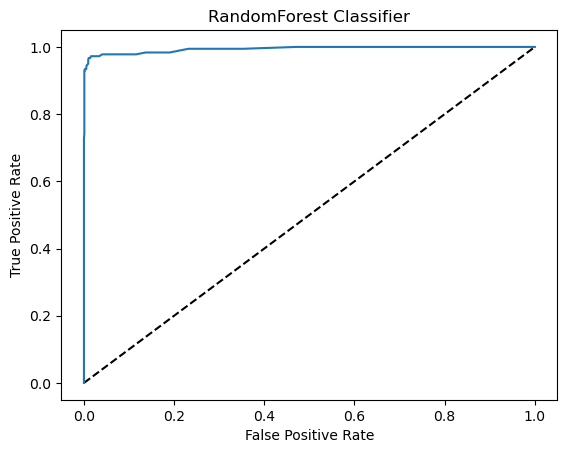

0.9360319362802447


In [52]:
#AUC_ROC Curve of Randomforest Classifier with oversampled data
y_pred_prob=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Classifier')
plt.show()

auc_score=roc_auc_score(y_test,rfc.predict(x_test))
print(auc_score)

# Finalizing the model

In [53]:
rfc_prediction=rfc.predict(X)
#Making a dataframe of predictions
malignant_prediction=pd.DataFrame({'Predictions':rfc_prediction})
malignant_prediction

Predictions
0               0
1               0
2               1
3               0
4               0
...           ...
4452            0
4453            0
4454            0
4455            0
4456            0

[4457 rows x 1 columns]

In [54]:
#Saving the model
import pickle
filename='EmailSpam_Project.pkl'   #Specifying the filename
pickle.dump(rfc,open(filename,'wb'))  

# Conclusion

### Workflow Recap

We converted all the text to lower case and made a bag of words.
Counted the frequency of each word and chose 3,000 most frequent word
Make a feature set that is simply a sequence of True, False based on whether the data set contains word in "frequent word" set or not.

featureset[0] = 'e.g' "bread" : False, "happy" : True, "snow" : False, "beer" : False, "turtle" : True , 'Spam'
featureset[1] = 'e.g' "bread" : True, "happy" : True, "snow" : False, "beer" : True, "turtle" : True , 'Ham'

Seperate featureset into train set and test set.
Build seven different ML models and train them
Make a voteClassifier based on the trained seven models
Evaluate the models
Choose the best model and pickle it

### Result

Logistic Regression and vote_classifier showed the best accuracy (98.25%)

### Things to work on in the future

Do some more extensive analysis on the text.

Get rid of all the punctuation and stop words to see the difference in the result.